<a href="https://colab.research.google.com/github/caramos84/Quantum/blob/main/OrbitalHypergraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Hipergrafos de Wolfram de estructura rizomática
# Carlos Ramos + ChatGPT 4o
# 19/03/2025

# Importación de librerías
!pip install svgwrite

import networkx as nx
import matplotlib.pyplot as plt
import random
import svgwrite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.1 MB/s eta 0:00:00


In [62]:
# Definición de la función de estructura nodal rizomática
def generate_rhizomatic_graph(num_nodes=1000, branching_factor=100, long_range_prob=0.5):
    G = nx.Graph()
    initial_nodes = random.sample(range(num_nodes), k=10)  # Multiples puntos de inicio
    G.add_nodes_from(initial_nodes)

    for node in initial_nodes:
        for _ in range(branching_factor):
            new_node = len(G.nodes)
            G.add_node(new_node)
            G.add_edge(node, new_node)

    for _ in range(num_nodes - len(G.nodes)):
        parent = random.choice(list(G.nodes))
        new_node = len(G.nodes)
        G.add_node(new_node)
        G.add_edge(parent, new_node)

        if random.random() < long_range_prob:
            distant_node = random.choice(list(G.nodes))
            G.add_edge(new_node, distant_node)

    return G

In [40]:
# Definición de la función de graficación

def save_graph_as_svg(G, filename="rhizomatic_graph.svg"):
    pos = nx.spring_layout(G, k=0.15)
    dwg = svgwrite.Drawing(filename, profile='tiny')

    for edge in G.edges():
        x1, y1 = pos[edge[0]]
        x2, y2 = pos[edge[1]]
        dwg.add(dwg.line(start=(x1*500+250, y1*500+250),
                          end=(x2*500+250, y2*500+250),
                          stroke='gray', stroke_width=1))

    for node in G.nodes():
        x, y = pos[node]
        dwg.add(dwg.circle(center=(x*500+250, y*500+250),
                           r=3, fill='black'))

    dwg.save()



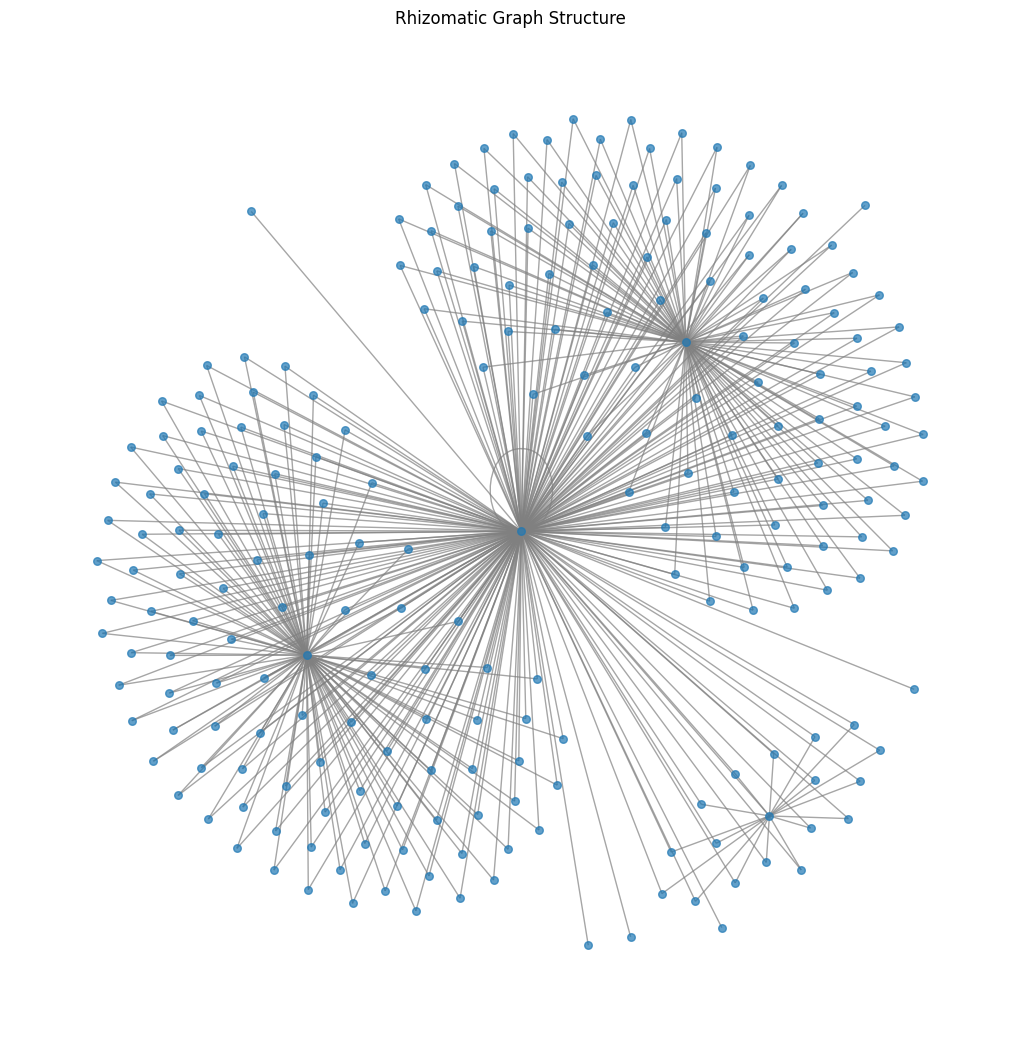

In [67]:
# Generación de la visualización en .SVG

G = generate_rhizomatic_graph()
save_graph_as_svg(G)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.15)
nx.draw(G, pos, node_size=30, edge_color='gray', alpha=0.7, with_labels=False)
plt.title("Rhizomatic Graph Structure")
plt.show()